In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# TextBlob (subjectivity & polarity)

In [ ]:
!pip install pandas
!pip install textblob

In [ ]:
import pandas as pd
from textblob import TextBlob

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Mis estudios /BBS/Customer & Marketing Analytics/GroupProject#2/CMA Main Assignment 2 Data Set.csv', encoding='utf-8', delimiter=';')

In [ ]:
df.head(3)

,id,created_at,text,lang,like,reply,retweet,view,brand,followers,following,total_tweets
0,"1,6455E+18",10/04/2023 21:00,Lagging on filing taxes? You can use PayPal Cr...,en,107,32,8,19349,PayPal,975593,935,12252
1,"1,64473E+18",08/04/2023 18:00,We’re defining terms throughout April in honor...,en,118,46,10,18764,PayPal,975593,935,12252
2,"1,64437E+18",07/04/2023 18:00,When your tax refunds deposits directly into y...,en,135,45,23,21537,PayPal,975593,935,12252


In [ ]:
df['brand'].value_counts()

,count
brand,
amazon,296
Walmart,126
PayPal,105
Zoom,74
UPS,71
Dell,66


In [ ]:
df['brand'].value_counts(normalize=True)

,proportion
brand,
amazon,0.401084
Walmart,0.170732
PayPal,0.142276
Zoom,0.100271
UPS,0.096206
Dell,0.089431


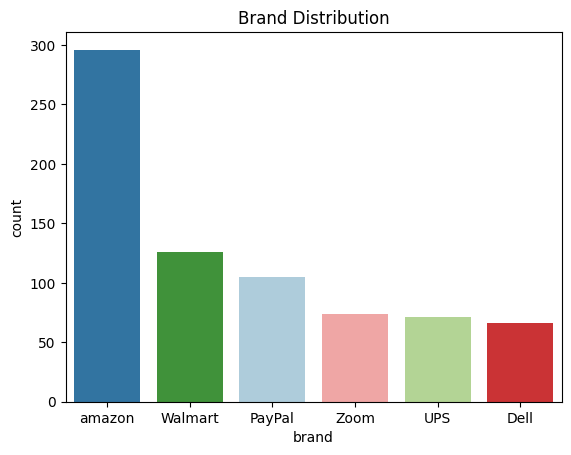

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='brand',
              data= df,
              hue='brand',
              legend=False,
              order=df['brand'].value_counts().index,
              palette='Paired',
              )
plt.title('Brand Distribution')

plt.show()

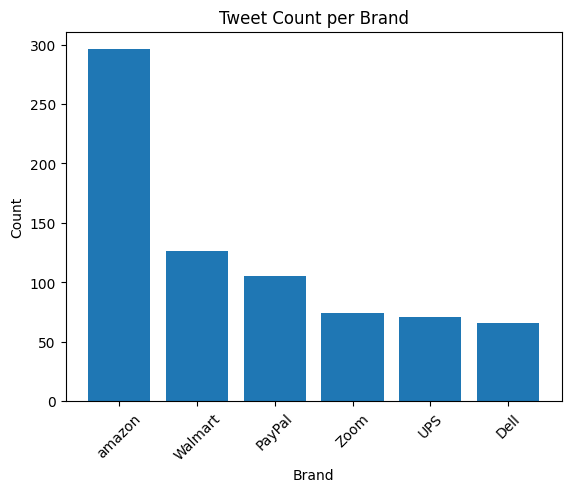

In [ ]:
import matplotlib.pyplot as plt

# Contar la cantidad de tweets por brand
brand_counts = df['brand'].value_counts()

# Crear gráfico de barras
plt.bar(brand_counts.index, brand_counts.values)

# Etiquetas y título
plt.xlabel('Brand')
plt.ylabel('Count')
plt.title('Tweet Count per Brand')

# Rotar etiquetas si son muchas
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


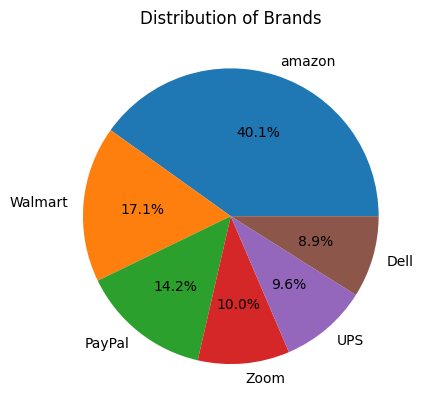

In [ ]:
import matplotlib.pyplot as plt
counts = df['brand'].value_counts()

plt.pie(counts, labels=counts.index, autopct='%1.1f%%')
plt.title('Distribution of Brands')
plt.show()


In [ ]:
df.isnull().sum()  #We have 0 missing values

,0
id,0
created_at,0
text,0
lang,0
like,0
reply,0
retweet,0
view,0
brand,0
followers,0


In [ ]:
sentiments = []
polarities = []
for text in df['text']:
    blob = TextBlob(text)
    sentiments.append(blob.sentiment.subjectivity)
    polarities.append(blob.sentiment.polarity)

df['sentiment_subjectivity'] = sentiments
df['sentiment_polarity'] = polarities
# save the updated data to a new csv file
new_file_path = input("Enter output file path: ") # add .csv at the end (e.g., sentiments_results.csv)
df.to_csv(new_file_path, index=False)

print("Done!")

print(df.head(10))

Enter output file path: yeah
Done!
            id        created_at  \
0   1,6455E+18  10/04/2023 21:00   
1  1,64473E+18  08/04/2023 18:00   
2  1,64437E+18  07/04/2023 18:00   
3  1,64407E+18  06/04/2023 22:14   
4  1,64401E+18  06/04/2023 18:22   
5  1,64364E+18  05/04/2023 17:54   
6  1,64327E+18  04/04/2023 17:24   
7  1,64327E+18  04/04/2023 17:24   
8  1,64295E+18  03/04/2023 20:00   
9  1,64254E+18  02/04/2023 17:00   

                                                text lang  like  reply  \
0  Lagging on filing taxes? You can use PayPal Cr...   en   107     32   
1  We’re defining terms throughout April in honor...   en   118     46   
2  When your tax refunds deposits directly into y...   en   135     45   
3  .@BottleRockNapa is just around the corner! \n...   en    70     16   
4  It’s your money – why wait to use it? Get your...   en   122     34   
5  The tax filing deadline is quickly approaching...   en    78     27   
6  We’re adding new features to PayPal’s complete.

- the polarity score ranges from -1 to +1, where -1 means very negative sentiment, 0 means neutral sentiment, and +1 means very positive sentiment.

- Similarly, subjectivity score also ranges from 0 to 1, where 0 means the text is very objective or factual, and 1 means the text is very subjective or opinionated.

In [ ]:
df.head(2)

,id,created_at,text,lang,like,reply,retweet,view,brand,followers,following,total_tweets,sentiment_subjectivity,sentiment_polarity
0,"1,6455E+18",10/04/2023 21:00,Lagging on filing taxes? You can use PayPal Cr...,en,107,32,8,19349,PayPal,975593,935,12252,0.3625,-0.042708
1,"1,64473E+18",08/04/2023 18:00,We’re defining terms throughout April in honor...,en,118,46,10,18764,PayPal,975593,935,12252,0.2500,0.033333


In [ ]:
df.dtypes

,0
id,object
created_at,object
text,object
lang,object
like,int64
reply,int64
retweet,int64
view,int64
brand,object
followers,int64


In [ ]:
df['sentiment_category'] = df['sentiment_polarity'].apply(lambda x: 'Positive' if x > 0 else 'Negative')
# Clasificación en objetivo y subjetivo
df['subjectivity_category'] = df['sentiment_subjectivity'].apply(lambda x: 'Objective' if x < 0.5 else 'Subjective')

# Contar los valores
sentiment_counts = df['sentiment_category'].value_counts()
subjectivity_counts = df['subjectivity_category'].value_counts()

<ipython-input-16-ca148d2506d9>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes[0], palette=['red', 'green'])
<ipython-input-16-ca148d2506d9>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=subjectivity_counts.index, y=subjectivity_counts.values, ax=axes[1], palette=['blue', 'orange'])


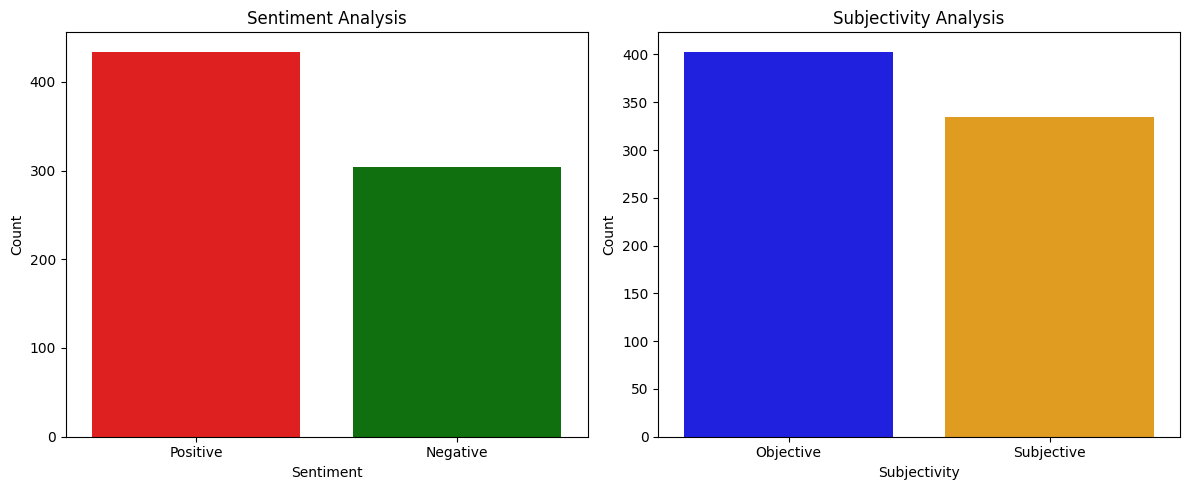

In [ ]:

# Crear gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Sentimiento
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, ax=axes[0], palette=['red', 'green'])
axes[0].set_title("Sentiment Analysis")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Sentiment")

# Gráfico de Subjetividad
sns.barplot(x=subjectivity_counts.index, y=subjectivity_counts.values, ax=axes[1], palette=['blue', 'orange'])
axes[1].set_title("Subjectivity Analysis")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Subjectivity")

plt.tight_layout()
plt.show()


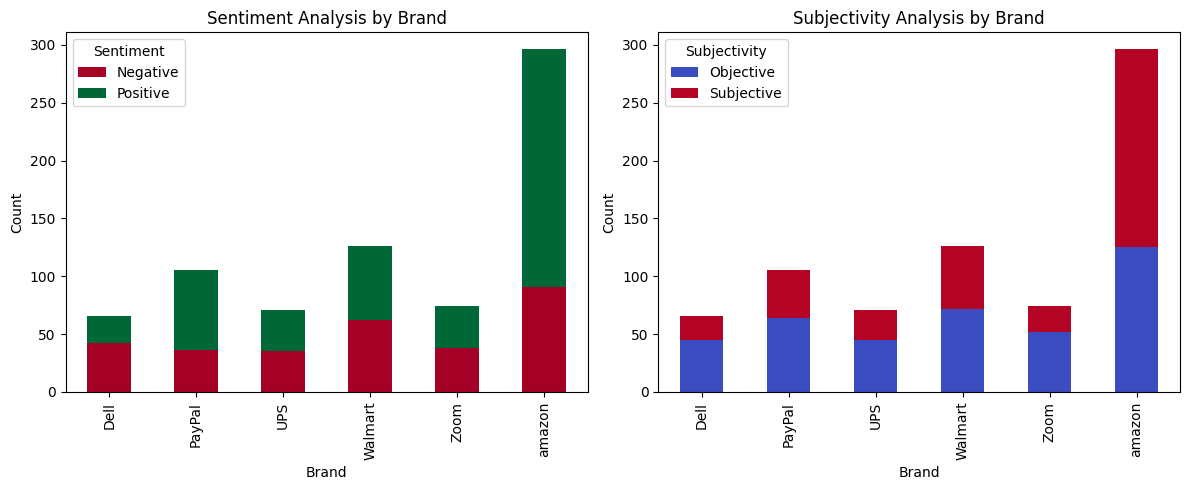

In [ ]:

# Contar los valores por marca
sentiment_counts = df.groupby(['brand', 'sentiment_category']).size().unstack(fill_value=0)
subjectivity_counts = df.groupby(['brand', 'subjectivity_category']).size().unstack(fill_value=0)

# Crear gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Sentimiento por Marca
sentiment_counts.plot(kind='bar', stacked=True, ax=axes[0], colormap='RdYlGn')
axes[0].set_title("Sentiment Analysis by Brand")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Brand")
axes[0].legend(title="Sentiment")

# Gráfico de Subjetividad por Marca
subjectivity_counts.plot(kind='bar', stacked=True, ax=axes[1], colormap='coolwarm')
axes[1].set_title("Subjectivity Analysis by Brand")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Brand")
axes[1].legend(title="Subjectivity")

plt.tight_layout()
plt.show()


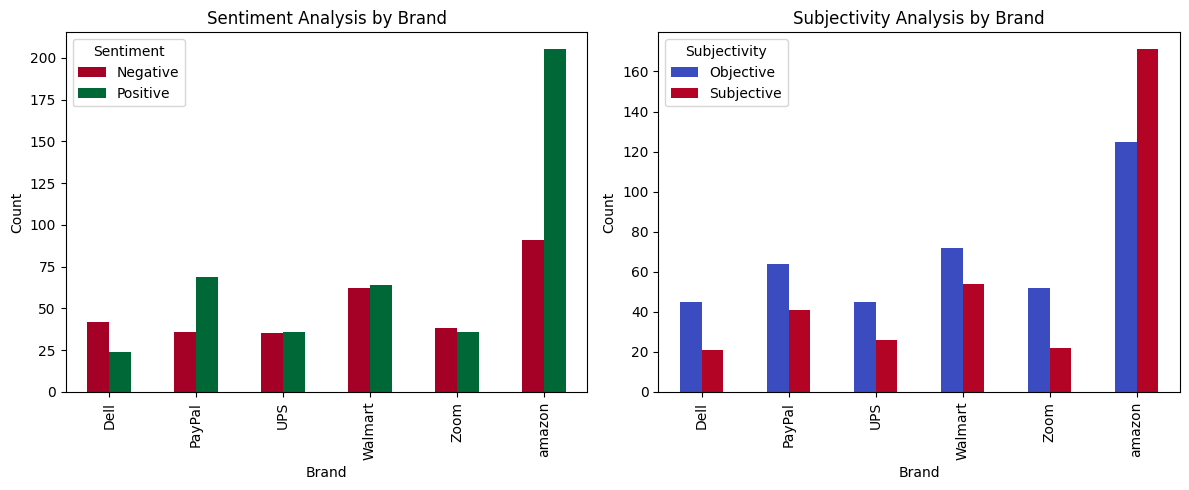

In [ ]:

# Contar los valores por marca
sentiment_counts = df.groupby(['brand', 'sentiment_category']).size().unstack(fill_value=0)
subjectivity_counts = df.groupby(['brand', 'subjectivity_category']).size().unstack(fill_value=0)

# Crear gráficos
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico de Sentimiento por Marca
sentiment_counts.plot(kind='bar', stacked=False, ax=axes[0], colormap='RdYlGn')
axes[0].set_title("Sentiment Analysis by Brand")
axes[0].set_ylabel("Count")
axes[0].set_xlabel("Brand")
axes[0].legend(title="Sentiment")

# Gráfico de Subjetividad por Marca
subjectivity_counts.plot(kind='bar', stacked=False, ax=axes[1], colormap='coolwarm')
axes[1].set_title("Subjectivity Analysis by Brand")
axes[1].set_ylabel("Count")
axes[1].set_xlabel("Brand")
axes[1].legend(title="Subjectivity")

plt.tight_layout()
plt.show()



Next:
- Do the Positive & Negativa separation by creating a column for Positive & Another for Negative for subjectivity & Polarity.
- And then show it by Brand (I think with a Graph that can be easily done=
-

# Zero-Shot (Informational vs Emotional)

In [ ]:
!pip install transformers

In [ ]:
import pandas as pd
from transformers import pipeline

In [ ]:
# load the zero-shot classifier
classifier = pipeline("zero-shot-classification", model= 'facebook/bart-large-mnli')

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.15k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/1.63G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Device set to use cpu


In [ ]:
labels = ["emotional", "informational"]
scores = []
best_labels = []

In [ ]:
for text in df["text"]:
    result = classifier(text, labels)
    score_dict = dict(zip(result["labels"], result["scores"]))
    score_row = [score_dict[label] for label in labels]
    best_label = max(score_dict, key=score_dict.get)
    scores.append(score_row)
    best_labels.append(best_label)
# add the scores and best_labels as new columns to the data
df["emotional_score"] = [score[0] for score in scores]
df["informational_score"] = [score[1] for score in scores]
df["best_label"] = best_labels

In [ ]:
labels = ["emotional", "informational"]
scores = [] # Resetting before using
best_labels = [] # Resetting before using

for text in df["text"]:
    result = classifier(text, labels)
    score_dict = dict(zip(result["labels"], result["scores"]))
    score_row = [score_dict[label] for label in labels]
    best_label = max(score_dict, key=score_dict.get)
    scores.append(score_row)
    best_labels.append(best_label)

# add the scores and best_labels as new columns to the data
df["emotional_score"] = [score[0] for score in scores]
df["informational_score"] = [score[1] for score in scores]
df["best_label"] = best_labels

In [ ]:
df.head()

,id,created_at,text,lang,like,reply,retweet,view,brand,followers,following,total_tweets,sentiment_subjectivity,sentiment_polarity,sentiment_category,subjectivity_category,emotional_score,informational_score,best_label
0,"1,6455E+18",10/04/2023 21:00,Lagging on filing taxes? You can use PayPal Cr...,en,107,32,8,19349,PayPal,975593,935,12252,0.3625,-0.042708,Negative,Objective,0.109028,0.890972,informational
1,"1,64473E+18",08/04/2023 18:00,We’re defining terms throughout April in honor...,en,118,46,10,18764,PayPal,975593,935,12252,0.2500,0.033333,Positive,Objective,0.161416,0.838584,informational
2,"1,64437E+18",07/04/2023 18:00,When your tax refunds deposits directly into y...,en,135,45,23,21537,PayPal,975593,935,12252,0.4000,0.100000,Positive,Objective,0.600040,0.399960,emotional
3,"1,64407E+18",06/04/2023 22:14,.@BottleRockNapa is just around the corner! \n...,en,70,16,7,24140,PayPal,975593,935,12252,0.8000,0.400000,Positive,Subjective,0.265939,0.734061,informational
4,"1,64401E+18",06/04/2023 18:22,It’s your money – why wait to use it? Get your...,en,122,34,24,22992,PayPal,975593,935,12252,0.3500,0.100000,Positive,Objective,0.292412,0.707588,informational


In [ ]:
# save the updated data to a new csv file
new_file_path = input("Enter output file path: ") # add .csv at the end (e.g., my_results.csv)
df.to_csv(new_file_path, index=False)

print("Done!")
print(data.head(10))